# 3 Step-by-Step Tutorials

Reproduces some plots in Chapter 3 of the PGFManual at http://pgfplots.sourceforge.net/pgfplots_unstable.pdf

In [1]:
import PGFPlotsX: Axis, Plot, Plot3, TikzPicture, TikzDocument,
                  Table, Expression, Coordinates, @pgf
using LaTeXStrings

## 3.2 Solving a Real Use Case: Function Visualization

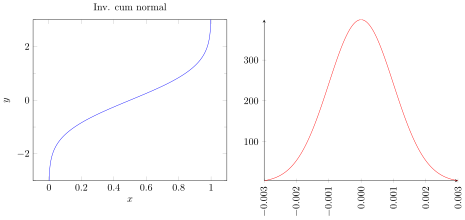

In [2]:
@pgf begin
    
axis1 = Axis(Plot(Table("plotdata/invcum.dat"), {blue}; incremental = false),
{
    title = "Inv. cum normal",
    xlabel = L"x",
    ylabel = L"y",
    ymin = -3,
    ymax = 3,
    minor_y_tick_num = 1,
})

μ = 0
σ = 1e-3
    
axis2 = Axis(Plot(Expression("exp(-(x-$μ)^2 / (2 * $σ^2)) / ($σ * sqrt(2*pi))"),
        {
            red, 
            domain = "-3*$σ:3*$σ",
            samples = 201
        }; incremental = false),
    {
        axis_lines = "left",
        scaled_ticks = false,
        xticklabel_style = 
        {
            rotate = 90,
            anchor = "east",
            "/pgf/number format/precision" = 3,
            "/pgf/number format/fixed",
            "/pgf/number format/fixed zerofill"
        }
    }
)

TikzDocument([TikzPicture(axis1, { baseline }), "\\hskip 10pt", TikzPicture(axis2, { baseline })])    

end # @pgf 

## 3.3 Solving a Real Use Case: Scientific Data Analysis

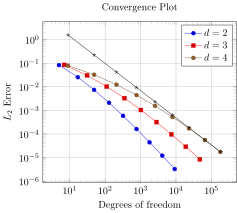

In [3]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, "\\usepackage{pgfplotstable}")

plots = []

for i in 2:4
    table = Table("plotdata/data_d$i.dat")
    plot = Plot(table; label ="\$d = $i\$")
    push!(plots, plot)
end

@pgf begin
table = Table("plotdata/data_d4.dat", 
    {
        x = "dof",
        y = {
                "create col/linear regression" =
                {
                    y = "l2_err",
                    variance_list = [1000, 800, 600, 500, 400, 200, 100]
                }
            }
    }     
)

axis = Axis([plots; Plot(table)],
    {
        title = "Convergence Plot",
        xlabel = "Degrees of freedom",
        ylabel = L"$L_2$ Error",
        xmode = "log",
        ymode = "log",
        grid = "major"
    }
)
end # @pgf

## 3.4 Use Cases involving Scatter Plots

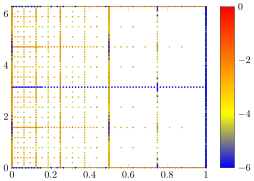

In [4]:
@pgf begin

axis = Axis(
        Plot(Table("plotdata/concat_VV_together_grid.dat"),
        {
            only_marks, 
            scatter,
            point_meta = "ln(1e-6+abs(\\thisrow{f(x)}))/ln(10)",
            mark_size = "0.6pt"
        }
    ),
    {
        enlargelimits = false, 
        colorbar
    }
)
end

## 3.5 Solving a Real Use Case: Functions of Two Variables

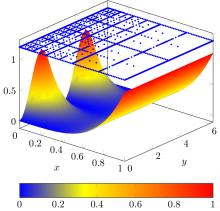

In [5]:
@pgf begin
plot = Plot3(Table("plotdata/concat_VV_together.dat"),
    {
        surf, 
        "mesh/ordering" = "y varies",
        shader = "interp",
    }; incremental = false
)

plot2 = Plot3(Table("plotdata/concat_VV_together_grid.dat",
        {
            z_expr = 1.2,
        },
    ),
    {
        blue, 
        mark_options = "fill=blue!80!black",
        only_marks,
        mark_size = "0.6pt",
        shader = "interp",
    }; incremental = false
)
        
axis = Axis([plot, plot2],
    {
        "view/h" = 40,
        colorbar_horizontal,
        xlabel = L"x",
        ylabel = L"y",
    }
)

end # @pgf

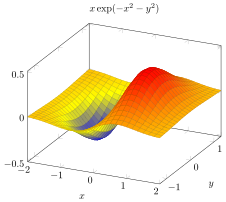

In [6]:
@pgf begin
plot = Plot3(Expression("x * exp(-x^2 - y^2)"),
    {
        surf,
        domain = "-2:2",
        domain_y = "-1.3:1.3",
    }; incremental = false
)
    
    axis = Axis(plot,
    {
        title = L"x \exp(-x^2 - y^2)",
        xlabel = L"x",
        ylabel = L"y",
    }
)
end